# **Projeto I - Aplicação de Métodos de Aprendizagem de Máquinas - UNIASSELVI**

# Definição do Tema

Será utilizada um conjunto de dados no formato csv (https://archive.ics.uci.edu/ml/datasets/Bank+Marketingh). Os dados referem-se a campanhas de marketing direto de uma instituição bancária portuguesa.
As campanhas de marketing foram baseadas em ligações telefônicas para os clientes, e o objetivo era fazer a captação de depósitos à prazo.
Um dos  problemas desse dataset é a grande discrepância entre o número de clientes contactados que aderiram à campanha (4.000), e os que não aderiram (521). Esse desequilíbrio dos dados faz com que os resultados das predições sejam bem ruins. Esse problema será resolvido na fase de pré-processamento, onde será aplicado o método SMOTE, que adicionará registros da classe minoritária, igualando-a à classe majoritária. Também será feita a conversão dos atributos categóricos para numéricos, pois a maioria dos métodos de machine learning só trabalham com este tipo de dados. Após a transformação dos dados, será feita a padronização da base, trazendo todos os atributos para uma escala entre 0 e 1.

# Objetivo
Esse projeto tem como objetivo desenvolver um modelo de Machine Learning que faça a previsão se um cliente contactado pelo banco irá ou não aderir a campanha, ou seja, fará ou não uma aplicação financeira.

# Especificação Técnica
Número de atributos: 16 atributos de entrada e 1 atributo de saída.

Variáveis de entrada:
- age: idade (numérica)
- job: tipo de trabalho (categórica)
- marital: estado civil (categórica)
- education: grau de instrução (categórica)
- default: tem crédito inadimplente? (binária: sim, não)
- balance: saldo médio anual, em euros (numérica)
- housing: tem crédito habitaconal? (binária: sim, não)
- loan: tem empréstimo pessoal? (binária: sim, não)
- contact: tipo de comunicação do contato (categórica)
- day: último dia de contato do mês (numérica)
- month: último mês de contato do ano (categórica)
- duration: duração do último contato, em segundos (numérica)
- campaign: quantidade de contatos realizados durante esta campanha e para este cliente (numérica)
- pdays: número de dias que passaram após o último contato do cliente de uma campanha anterior (numérica)
- previous: número de contatos realizados antes desta campanha e para este cliente (numérica)
- potcome: resultado da campanha de marketing anterior (categórica)

Variável de saída (alvo desejado):
- deposit: o cliente efetuou um depósito a prazo? (binária: sim, não)

A base de dados será dividida em 80% para treinamento, e 20% para teste.
Serão aplicados tres métodos de Machine Learning: Árvore de decisão (*DecisionTreeClassifier*), Random Forest (*RandomForestClassifier*) e KNN (*KNeighborsClassifier*), todos da biblioteca *sickit-learn*.
Para avaliação dos métodos, serão levadas em consideração as métricas *accuracy* e *recall*.





# Importação das bibliotecas básicas

In [ ]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

!pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Marketing de banco


*   Fonte: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



# Pré - Processamento

## Carregamento da base e visualização dos dados

In [ ]:
dados = pd.read_csv('bank.csv', sep=';')
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Tratamento de valores faltantes

In [ ]:
dados.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
dados.values

array([[30, 'unemployed', 'married', ..., 0, 'unknown', 'no'],
       [33, 'services', 'married', ..., 4, 'failure', 'no'],
       [35, 'management', 'single', ..., 1, 'failure', 'no'],
       ...,
       [57, 'technician', 'married', ..., 0, 'unknown', 'no'],
       [28, 'blue-collar', 'married', ..., 3, 'other', 'no'],
       [44, 'entrepreneur', 'single', ..., 7, 'other', 'no']],
      dtype=object)

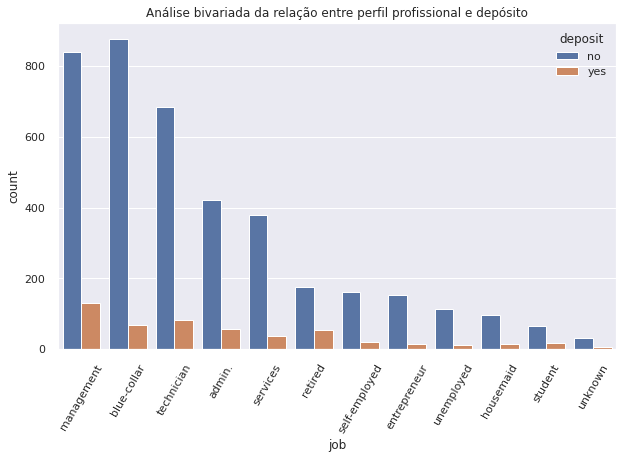

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 6)})
job = sns.countplot(x="job", data = dados, hue = "deposit", order = dados["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Análise bivariada da relação entre perfil profissional e depósito")
plt.show()

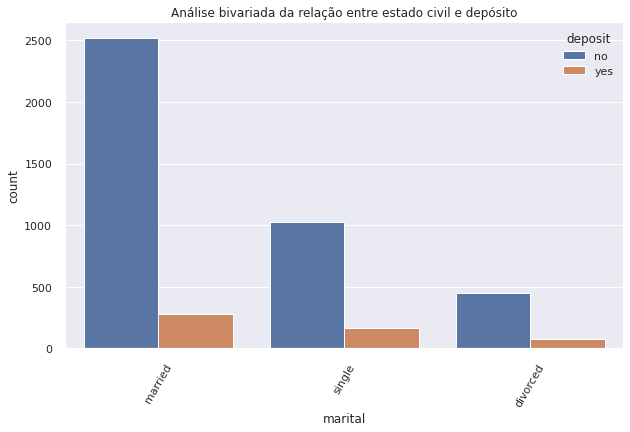

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 6)})
marital = sns.countplot(x="marital", data = dados, hue = "deposit", order = dados["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("Análise bivariada da relação entre estado civil e depósito")
plt.show()

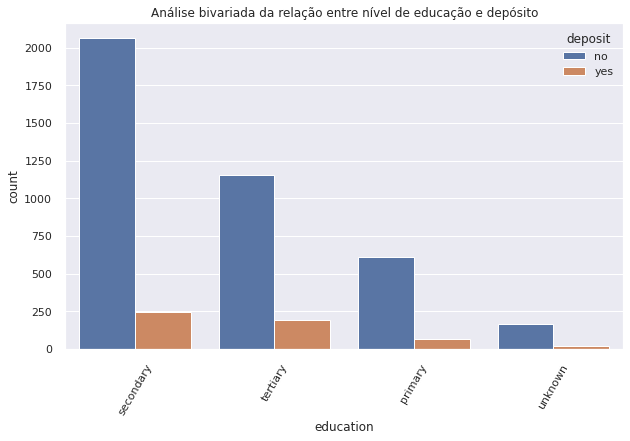

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 6)})
education = sns.countplot(x="education", data = dados, hue = "deposit", order = dados["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
plt.title("Análise bivariada da relação entre nível de educação e depósito")
plt.show()

**Transformação de atributos categóricos:** 

Após a transformação, foi atribuído o valor 0 aos clientes que não aderiram à campanha, e 1 aos que aderiram.

In [ ]:
for col_name in dados.columns:
  if (dados[col_name].dtype == 'object'):
    dados[col_name] = dados[col_name].astype('category')
    dados[col_name] = dados[col_name].cat.codes

In [ ]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [ ]:
dados.deposit.value_counts()

0    4000
1     521
Name: deposit, dtype: int64

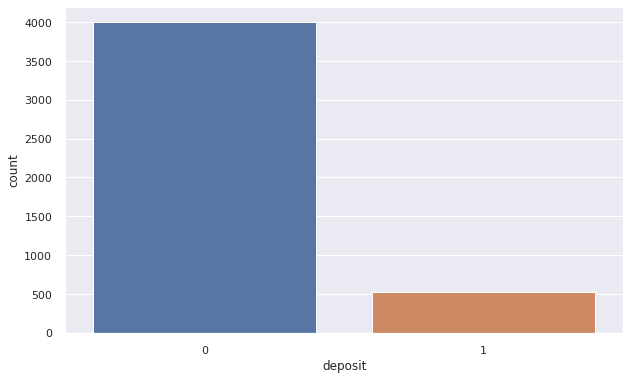

In [ ]:
ax = sns.countplot(x='deposit', data=dados)

## Divisão entre previsores e classe

In [ ]:
X_dados = dados.drop('deposit', axis=1)
y_dados = dados.deposit
print(X_dados.shape)
print(y_dados.shape)

(4521, 16)
(4521,)


# Sobreamostragem com SMOT

Para eliminar o desequilíbrio da base de dados, serão incluídos registros da classe minoritária(1), igualando-a à classe majoritária(0)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_dados, y_dados = smote.fit_sample(X_dados, y_dados)
print(X_dados.shape)
print(y_dados.shape)

(8000, 16)
(8000,)


In [ ]:
np.unique(y_dados, return_counts=True)

(array([0, 1], dtype=int8), array([4000, 4000]))

## Padronização da base de dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_dados = scaler_x.fit_transform(X_dados)

In [ ]:
X_dados

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.44117647, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.39705882, 0.09090909, 0.        , ..., 0.26490826, 0.08      ,
        0.        ],
       [0.16176471, 0.09090909, 0.5       , ..., 0.2706422 , 0.04      ,
        0.        ]])

## Divisão entre treinamento e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dados, y_dados, test_size=0.20, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

In [ ]:
y_test

array([0, 0, 0, ..., 0, 1, 1], dtype=int8)

## Salvar as variáveis

Após o tratamento dos dados e a divisão entre treinamento e teste, os dados são salvos em disco, para aplicações posteriores.

In [ ]:
with open('bank.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

# Aplicação dos algoritmos

In [ ]:
with open('bank.pkl', 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [ ]:
X_train.shape, y_train.shape

((6400, 16), (6400,))

## Árvore de decisão
Árvores de Decisão, ou *Decision Trees*, são algoritmos de machine learning largamente utilizados, com uma estrutura de simples compreensão e que costumam apresentar bons resultados em suas previsões. Eles também são a base do funcionamento de outros poderosos algoritmos, como o Random Forest, por exemplo.

**Estrutura de uma árvore de decisão**: 
Como o próprio nome sugere, neste algoritmo vários pontos de decisão serão criados. Estes pontos são os “nós” da árvore e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. Os caminhos existentes são os “ramos”. Esta é a estrutura básica de uma árvore de decisão. Os nós são responsáveis pelas conferências que irão indicar um ramo ou outro para sequência do fluxo.

Fonte: https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/


In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,
                                min_samples_split=2, splitter='best', random_state=1)
arvore.fit(X_train, y_train)
prev = arvore.predict(X_test)
print('Acurácia:', (round(accuracy_score(y_test, prev),4)))

Acurácia: 0.8638


In [ ]:
confusion_matrix(y_test, prev)

array([[666, 120],
       [ 98, 716]])

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       786
           1       0.86      0.88      0.87       814

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



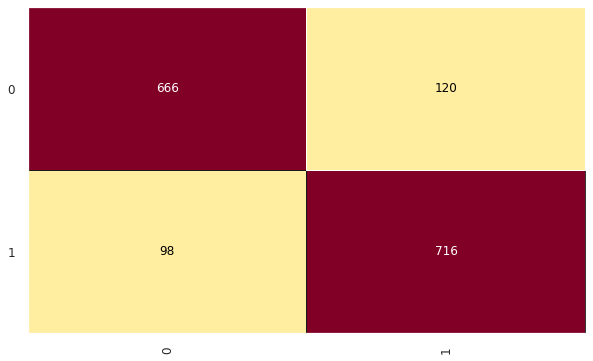

In [ ]:
cm = ConfusionMatrix(arvore)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
print(classification_report(y_test, prev))

## Random Forest

*Random Forest* (Floresta Aleatória) é um metaestimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
rf = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1)
rf.fit(X_train, y_train)
prev = rf.predict(X_test)
print('Acurácia:', (round(accuracy_score(y_test, prev),4)))

Acurácia: 0.9275


In [ ]:
confusion_matrix(y_test, prev)

array([[726,  60],
       [ 56, 758]])

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       786
           1       0.93      0.93      0.93       814

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



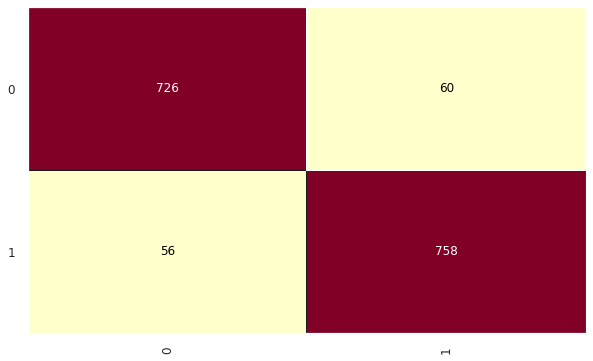

In [ ]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
print(classification_report(y_test, prev))

## KNN

**Resumo do processo realizado pelo algoritmo KNN**

1 ) Recebe um dado não classificado e mede a distância do novo dado em relação a cada um dos outros dados que já estão classificados;

2 ) Seleciona as K menores distâncias;

3 ) Verifica a(s) classe(s) dos dados que tiveram as K menores distâncias e contabiliza a quantidade de vezes que cada classe apareceu;

4 )  Classifica esse novo dado como pertencente à classe que mais apareceu.

Fonte: https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40, metric='minkowski', p=2)
knn.fit(X_train, y_train)
prev = knn.predict(X_test)
print('Acurácia:', (round(accuracy_score(y_test, prev),4)))

Acurácia: 0.8125


In [ ]:
confusion_matrix(y_test, prev)

array([[643, 143],
       [157, 657]])

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       786
           1       0.82      0.81      0.81       814

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



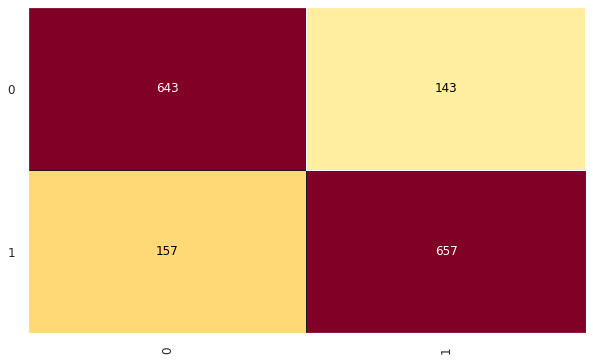

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
print(classification_report(y_test, prev))

# Tuning dos parâmetros

O GridSearchCV é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo. Ele fará, de maneira sistemática, diversas combinações dos parâmetros, e depois de avaliá-los, os armazenará num único objeto.

Fonte: https://andersonuyekita.github.io/notebooks/blog/2019/03/21/como-usar-o-gridsearchcv/

In [ ]:
n_estimators = [50, 100, 150, 200]
criterion = ['gini', 'entropy']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2']

rf_parametros = {'n_estimators': n_estimators,
                 'criterion': criterion,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'max_features': max_features}

RFtuning = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                        param_grid=rf_parametros,                        
                        cv=5)  
RFtuning.fit(X_dados, y_dados) 

print('Melhores parâmetros:', RFtuning.best_params_)
print('Melhor resultado:', RFtuning.best_score_)

Melhores parâmetros: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor resultado: 0.92775


# Validação cruzada

O método de validação cruzada denominado k-fold consiste em dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste.

Fonte: https://pt.wikipedia.org/wiki/Validação_cruzada

## Preparação dos dados

In [ ]:
with open('bank.pkl', 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f) 
  X_dados = np.concatenate((X_train, X_test), axis = 0)
  y_dados = np.concatenate((y_train, y_test), axis = 0)
X_dados.shape, y_dados.shape

((8000, 16), (8000,))

## Processamento

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  
rf = RandomForestClassifier(criterion='gini', max_features='auto',min_samples_leaf=1,
                            min_samples_split=2, n_estimators=200, random_state=42)
scores = cross_val_score(rf, X_dados, y_dados, cv = kfold)
for score in scores:
  print('Accuracy:', round(score,4))

Accuracy: 0.95
Accuracy: 0.9275
Accuracy: 0.94
Accuracy: 0.9275
Accuracy: 0.9412
Accuracy: 0.945
Accuracy: 0.935
Accuracy: 0.9438
Accuracy: 0.9288
Accuracy: 0.9325


In [ ]:
result_cv = round(pd.DataFrame(scores),4)
result_cv.describe()

,0
count,10.000000
mean,0.937130
std,0.008012
min,0.927500
25%,0.929725
50%,0.937500
75%,0.943150
max,0.950000


# Salvar um classificador já treinado

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classificador_rf=RandomForestClassifier(criterion='gini', max_features='auto',min_samples_leaf=1,
                                         min_samples_split=2, n_estimators=200, random_state=42)
classificador_rf.fit(X_dados, y_dados)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pickle.dump(classificador_rf, open('classificador_rf.sav', 'wb'))

# Carregar um classificador já treinado

In [ ]:
random_forest = pickle.load(open('classificador_rf.sav', 'rb'))

In [ ]:
novo_registro = X_dados[7999]
novo_registro

array([0.67647059, 0.27272727, 0.5       , 0.        , 0.        ,
       0.05041543, 0.        , 0.        , 0.        , 0.23333333,
       0.45454545, 0.33995366, 0.02040816, 0.        , 0.        ,
       1.        ])

In [ ]:
y_dados[7999]

1

In [ ]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 16)

In [ ]:
classificador_rf.predict(novo_registro)

array([1], dtype=int8)